# 图像融合-基于金字塔

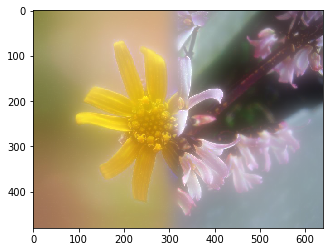

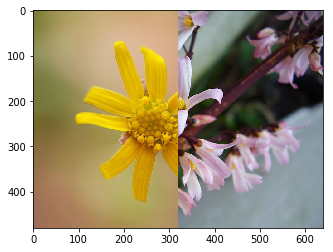

In [8]:
#coding:utf-8
import cv2
import numpy as np,sys
%matplotlib inline
import matplotlib.pyplot as plt

A = cv2.cvtColor(cv2.imread('../datas/f1.jpg'),cv2.COLOR_BGR2RGB)
B = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
 
#对A进行高斯金字塔模糊
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(gpA[i])
    gpA.append(G)
#对B进行高斯金字塔模糊
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(gpB[i])
    gpB.append(G)

#对A进行拉普拉斯金字塔模糊
lpA = [gpA[5]]
for i in range(5,0,-1):
    size = (gpA[i-1].shape[1], gpA[i-1].shape[0])
    GE = cv2.pyrUp(gpA[i], dstsize=size)
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
#对B进行拉普拉斯金字塔模糊
lpB = [gpB[5]]
for i in range(5,0,-1):
    size = (gpB[i-1].shape[1], gpB[i-1].shape[0])
    GE = cv2.pyrUp(gpB[i], dstsize=size)
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
#左右每一半的图像都添加到每一层
#生成一个单独的数组
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

ls_ = LS[0]
for i in range(1,6):
    size = (LS[i].shape[1], LS[i].shape[0])
    ls_ = cv2.pyrUp(ls_, dstsize=size)
    ls_ = cv2.add(ls_, LS[i])

real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

plt.figure()
plt.imshow(ls_)
plt.figure()
plt.imshow(real)
